In [91]:
import pandas as pd
asb_sig = pd.read_csv("sig.asb.scores.tsv", sep="\t", header=0)

In [92]:
asb_sig["pos0"] =  asb_sig["pos"] - 1

In [93]:
asb_sig_p = asb_sig[["chr", "pos0"]+asb_sig.columns[1:-1].tolist()]

In [94]:
import pybedtools
beds_var = pybedtools.BedTool.from_dataframe(asb_sig_p)
peak_bed = pybedtools.BedTool('merged.peaks.af.bed')
sig_vars_in_bed = beds_var.intersect(peak_bed, wa=True)

In [95]:
sig_vars_in_bed = sig_vars_in_bed.to_dataframe(names=["chr", "pos0"]+asb_sig.columns[1:-1].tolist()).drop_duplicates()

In [96]:
sig_vars_in_bed.shape

(5897, 93)

In [97]:
asb_sig_p.shape
asb_sig = sig_vars_in_bed

In [98]:
asb_sig.head()

,chr,pos0,pos,allele1,allele2,rsid,Esan.mean.logfc,Esan.mean.abs_logfc,Esan.mean.jsd,Esan.mean.abs_logfc_x_jsd,...,GM12878.ENCSR000EMT.mean.jsd,GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd,GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile,GM12878.ENCSR000EMT.mean.max_percentile,GM12878.ENCSR000EMT.mean.abs_logfc.pval,GM12878.ENCSR000EMT.mean.jsd.pval,GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd.pval,GM12878.ENCSR000EMT.mean.abs_logfc_x_jsd_x_max_percentile.pval,variantID,meanLog2FC
0,chr1,976214,976215,A,G,1_976215_A_G,0.148617,0.186169,0.029973,0.005416,...,0.032590,0.001415,0.000633,0.481828,0.253143,0.049575,0.167523,0.095002,1_976215_A_G,-1.852605
1,chr1,1038818,1038819,T,C,1_1038819_C_T,0.139453,0.139453,0.021787,0.003160,...,0.014620,0.000718,0.000263,0.300824,0.271734,0.301306,0.284252,0.209941,1_1038819_C_T,2.390945
2,chr1,1038844,1038845,G,A,1_1038845_A_G,-0.354500,0.354500,0.029879,0.010773,...,0.045086,0.011743,0.005479,0.424614,0.015937,0.020823,0.017209,0.013088,1_1038845_A_G,2.163432
3,chr1,1038915,1038916,G,A,1_1038916_A_G,-0.166982,0.166982,0.023631,0.004226,...,0.028406,0.005834,0.002762,0.453376,0.029725,0.065693,0.040467,0.026564,1_1038916_A_G,2.062560
4,chr1,1038974,1038975,A,G,1_1038975_G_A,0.124901,0.124901,0.014194,0.001762,...,0.012718,0.000438,0.000189,0.411085,0.396189,0.391443,0.386464,0.229546,1_1038975_G_A,1.898451


In [99]:
asb_sig.shape

(5897, 93)

In [100]:
asb_sig.columns

Index(['chr', 'pos0', 'pos', 'allele1', 'allele2', 'rsid', 'Esan.mean.logfc',
       'Esan.mean.abs_logfc', 'Esan.mean.jsd', 'Esan.mean.abs_logfc_x_jsd',
       'Esan.mean.abs_logfc_x_jsd_x_max_percentile',
       'Esan.mean.max_percentile', 'Esan.mean.abs_logfc.pval',
       'Esan.mean.jsd.pval', 'Esan.mean.abs_logfc_x_jsd.pval',
       'Esan.mean.abs_logfc_x_jsd_x_max_percentile.pval', 'Mende.mean.logfc',
       'Mende.mean.abs_logfc', 'Mende.mean.jsd', 'Mende.mean.abs_logfc.pval',
       'Mende.mean.jsd.pval', 'Yoruba.mean.logfc', 'Yoruba.mean.abs_logfc',
       'Yoruba.mean.jsd', 'Yoruba.mean.abs_logfc.pval', 'Yoruba.mean.jsd.pval',
       'GM12878.ENCSR095QNB.mean.logfc', 'GM12878.ENCSR095QNB.mean.abs_logfc',
       'GM12878.ENCSR095QNB.mean.jsd',
       'GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd',
       'GM12878.ENCSR095QNB.mean.abs_logfc_x_jsd_x_max_percentile',
       'GM12878.ENCSR095QNB.mean.max_percentile',
       'GM12878.ENCSR095QNB.mean.abs_logfc.pval',
       'GM12878.EN

In [101]:
import numpy as np
import scipy.stats
print("ATAC (572M)", scipy.stats.pearsonr(asb_sig["meanLog2FC"], asb_sig["GM12878.ENCSR637XSC.mean.logfc"]))
print("DNase", scipy.stats.pearsonr(asb_sig["meanLog2FC"], asb_sig["GM12878.ENCSR000EMT.mean.logfc"]))
print("ATAC (50M)", scipy.stats.pearsonr(asb_sig["meanLog2FC"], asb_sig["GM12878.ENCSR637XSC.50M.mean.logfc"]))

ATAC (572M) (0.6848214217530895, 0.0)
DNase (0.6636292058176858, 0.0)
ATAC (50M) (0.6671964992250254, 0.0)


(-3.0, 3.0)

<Figure size 576x576 with 0 Axes>

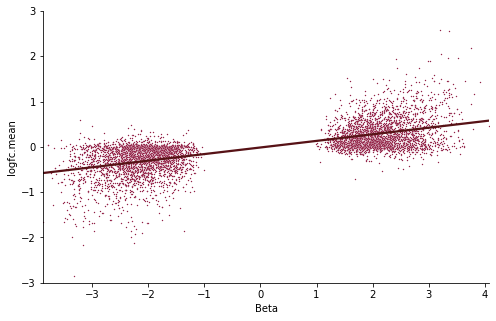

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

plt.figure(figsize=(8,8))

data = pd.DataFrame()
data["logfc.mean"] = asb_sig["GM12878.ENCSR637XSC.mean.logfc"]
data["Beta"] = asb_sig["meanLog2FC"]

plt.figure(figsize=(8,5))


# sns.kdeplot(
#     data=data,
#     x="Beta",
#     y="sd_sign.mean",
#     levels=5,
#     fill=False,
#     alpha=0.2,
#     color="grey",
#     cut=2,

# )

ax = sns.scatterplot(x="Beta", y="logfc.mean", data=data, s=2, color="#921F45", rasterized=True)
sns.regplot(x="Beta", y="logfc.mean", data=data, scatter=False, ci=None, color="#571216")


# Remove the legend and add a colorbar
ax.spines[["top","right"]].set_visible(False)
ax.set_ylim((-3,3))
#plt.savefig("subfigs_new/microglia_caqtls_scatter_plot.pdf", transparent=True, dpi=300)



In [103]:
max(data["logfc.mean"])

2.57592164

In [24]:
allca = pd.read_csv("/oak/stanford/groups/akundaje/projects/african_omics/outs/10_15_2022_per_ancestry_scores/tables/all_caqtls.scores.tsv", sep="\t")

In [25]:
data1 = pd.read_csv("/mnt/lab_data2/anusri/enformer/eu_caqtls/source.tsv", sep="\t", header=0)

In [27]:
data1["rsid"] = data1["chr"] + "_" + data1["pos"].astype(str) + "_" + data1["allele1"] + "_" + data1["allele2"]
allca["rsid1"] = allca["chr"] + "_" + allca["pos"].astype(str) + "_" + allca["allele1"] + "_" + allca["allele2"]

In [28]:
data1.shape

(35547, 6)

In [30]:
allca = allca[allca["rsid1"].isin(data1["rsid"])]

In [31]:
import os

score_dir = '/oak/stanford/groups/akundaje/projects/african_omics/outs/10_15_2022_per_ancestry_scores/score_outputs'

ancestries = [i for i in os.listdir(score_dir)]

In [36]:
allca.head()

,chr,pos,allele1,allele2,rsid,Esan.mean.logfc,Esan.mean.abs_logfc,Esan.mean.jsd,Esan.mean.abs_logfc_x_jsd,Esan.mean.abs_logfc_x_jsd_x_max_percentile,...,abs_beta,rsid1,GM12878.ENCSR637XSC.mean.sign.jsd,Maasai.mean.sign.jsd,Yoruba.mean.sign.jsd,Luhya.mean.sign.jsd,Gambian.mean.sign.jsd,Esan.mean.sign.jsd,GM12878.ENCSR095QNB.mean.sign.jsd,Mende.mean.sign.jsd
1,chr1,866300,A,C,1_866300_A_C,-0.009280,0.022847,0.008537,0.000175,0.000082,...,0.006546,chr1_866300_A_C,0.012423,0.007669,-0.008802,-0.006376,0.009833,-0.008537,-0.008332,0.007980
14,chr1,959339,C,T,1_959339_C_T,-0.001519,0.042955,0.016538,0.000735,0.000690,...,0.071807,chr1_959339_C_T,-0.021913,-0.015979,0.018475,0.018084,-0.019140,-0.016538,0.021064,-0.018353
16,chr1,960509,A,T,1_960509_A_T,0.019035,0.043295,0.017585,0.000681,0.000560,...,0.024701,chr1_960509_A_T,0.021601,0.016399,0.018414,0.015839,0.014366,0.017585,0.018586,0.013021
25,chr1,976038,A,C,1_976038_A_C,-0.002968,0.031418,0.012498,0.000420,0.000173,...,0.112788,chr1_976038_A_C,0.011073,0.011493,0.012195,0.011414,0.011089,-0.012498,0.014719,0.012412
27,chr1,976536,C,T,1_976536_C_T,0.036712,0.041889,0.012956,0.000660,0.000418,...,0.124874,chr1_976536_C_T,0.012069,0.012636,0.010555,0.011849,0.008071,0.012956,0.013633,0.011389


In [37]:
allca.shape

(35547, 86)

In [33]:
for outer_ancestry in ancestries:
    print(outer_ancestry)
    allca[outer_ancestry+'.mean.sign.jsd'] = allca[outer_ancestry+'.mean.jsd']*np.sign(allca[outer_ancestry+'.mean.logfc'])
    allca.loc[allca["allele1"] != allca["rsid"].str.split('_').str[2],outer_ancestry+'.mean.sign.jsd'] = -1*allca[allca["allele1"] != allca["rsid"].str.split('_').str[2]][outer_ancestry+'.mean.sign.jsd']

In [38]:
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(abs(allca[outer_ancestry + '.mean.sign.jsd']),
                                                 abs(allca[ancestry + '.mean.sign.jsd']))[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df


,GM12878.ENCSR637XSC,Maasai,Yoruba,Luhya,Gambian,Esan,GM12878.ENCSR095QNB,Mende
ancestry,,,,,,,,
GM12878.ENCSR637XSC,1.000000,0.911271,0.920471,0.925185,0.921426,0.920947,0.941677,0.914851
Maasai,0.911271,1.000000,0.954493,0.957497,0.954255,0.948734,0.913282,0.951579
Yoruba,0.920471,0.954493,1.000000,0.960244,0.957104,0.957161,0.921366,0.956367
Luhya,0.925185,0.957497,0.960244,1.000000,0.956365,0.955541,0.922344,0.954838
Gambian,0.921426,0.954255,0.957104,0.956365,1.000000,0.950060,0.928452,0.957745
Esan,0.920947,0.948734,0.957161,0.955541,0.950060,1.000000,0.920357,0.954099
GM12878.ENCSR095QNB,0.941677,0.913282,0.921366,0.922344,0.928452,0.920357,1.000000,0.921769
Mende,0.914851,0.951579,0.956367,0.954838,0.957745,0.954099,0.921769,1.000000


Text(0.5, 1.05, 'Ancestry vs. Ancestry ChromBPNet Absolute LogFC Pearson Correlation')

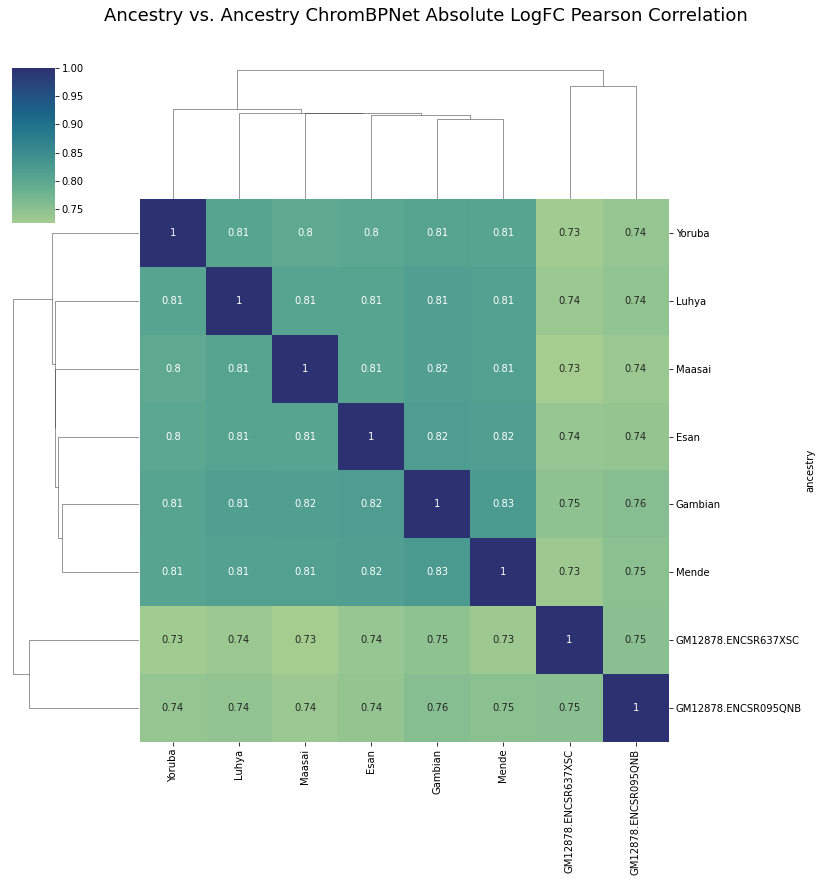

In [44]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Absolute LogFC Pearson Correlation', fontsize=18, y=1.05)

In [45]:
abs_logfc_dict = {x: [] for x in ancestries}
abs_logfc_dict['ancestry'] = []

for outer_ancestry in ancestries:
    abs_logfc_dict['ancestry'].append(outer_ancestry)
    for ancestry in ancestries:
        abs_logfc_dict[ancestry].append(scipy.stats.pearsonr(allca[outer_ancestry + '.mean.sign.jsd'],
                                                 allca[ancestry + '.mean.sign.jsd'])[0])
        
abs_logfc_df = pd.DataFrame(abs_logfc_dict)
abs_logfc_df.set_index('ancestry', inplace=True)

abs_logfc_df


,GM12878.ENCSR637XSC,Maasai,Yoruba,Luhya,Gambian,Esan,GM12878.ENCSR095QNB,Mende
ancestry,,,,,,,,
GM12878.ENCSR637XSC,1.000000,0.725571,0.730734,0.735344,0.747349,0.740282,0.752435,0.733996
Maasai,0.725571,1.000000,0.796325,0.809070,0.816647,0.806274,0.735885,0.813943
Yoruba,0.730734,0.796325,1.000000,0.806265,0.808546,0.800769,0.740764,0.806431
Luhya,0.735344,0.809070,0.806265,1.000000,0.814617,0.808537,0.744509,0.811847
Gambian,0.747349,0.816647,0.808546,0.814617,1.000000,0.818919,0.755806,0.825278
Esan,0.740282,0.806274,0.800769,0.808537,0.818919,1.000000,0.742561,0.815894
GM12878.ENCSR095QNB,0.752435,0.735885,0.740764,0.744509,0.755806,0.742561,1.000000,0.751026
Mende,0.733996,0.813943,0.806431,0.811847,0.825278,0.815894,0.751026,1.000000


Text(0.5, 1.05, 'Ancestry vs. Ancestry ChromBPNet Effect Size Pearson Correlation')

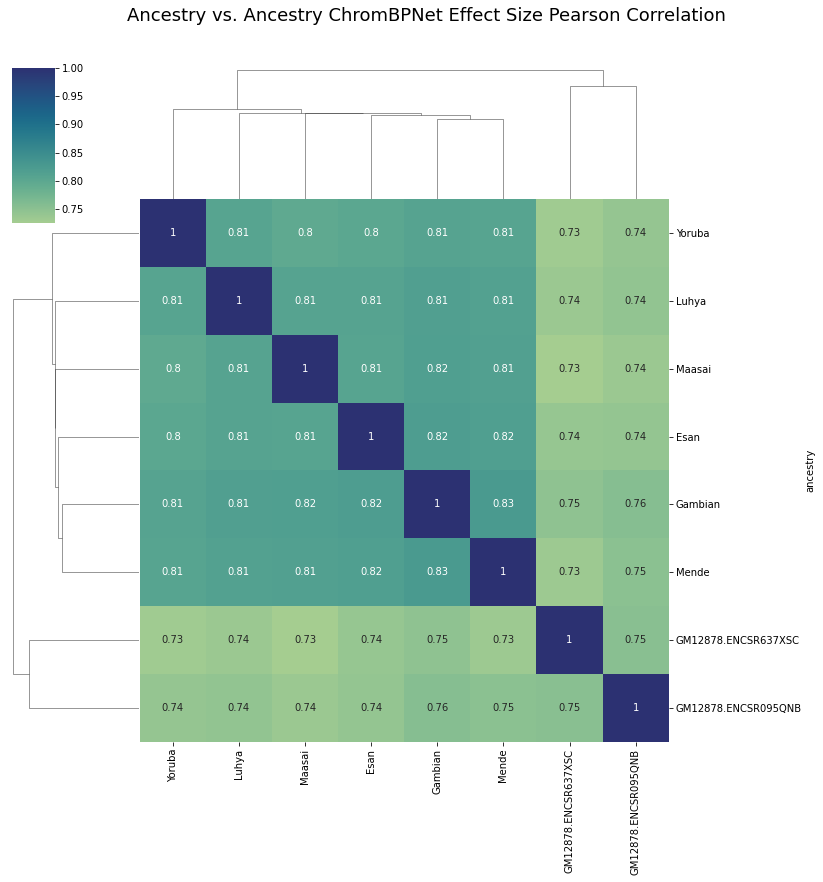

In [46]:
g = sns.clustermap(abs_logfc_df, annot=True, cmap="crest")
g.fig.set_figwidth(12)
g.fig.set_figheight(12)
g.fig.suptitle('Ancestry vs. Ancestry ChromBPNet Effect Size Pearson Correlation', fontsize=18, y=1.05)